In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
###


In [ ]:
class AdaptiveThreshold:
    #init是constructor
    def __init__(self,blockSize,C):
        self.filters = tf.ones((blockSize,blockSize,1,1),dtype=tf.float32)/blockSize**2
        self.C       = tf.constant(-C,dtype=tf.float32)

    def __call__(self,inputs):
        # hint: tf.nn.conv2d, tf.where
        kernel = np.zeros((1,1,3,3), np.float32)


        return x # return the resultant image, where 1 represents above the threshold and 0 represents below the threshold


In [ ]:

class Thinning:

    def __init__(self):
        self.filters1,self.filters2 = self._surface_patterns()

    @staticmethod
    def _surface_patterns():
        # generate the filters for rules 1 and 2
        return filters1, filters2 # for rules 1 and 2

    def __call__(self,inputs):
        #  do thinning
        #  padding is required
        x = tf.pad(inputs,tf.constant([[0,0],[1,1],[1,1],[0,0]]),constant_values=-1.0)
        while True:
            # tf.nn.conv2d, tf.math.reduce_max, tf.where
            # add your code for rule 1

            # add your code for rule 2

            # if no pixels are changed from 1 to -1, break this loop

        outputs = x[:,1:-1,1:-1,:]
        return outputs

507904/499068 [==============================] - 0s 1us/step


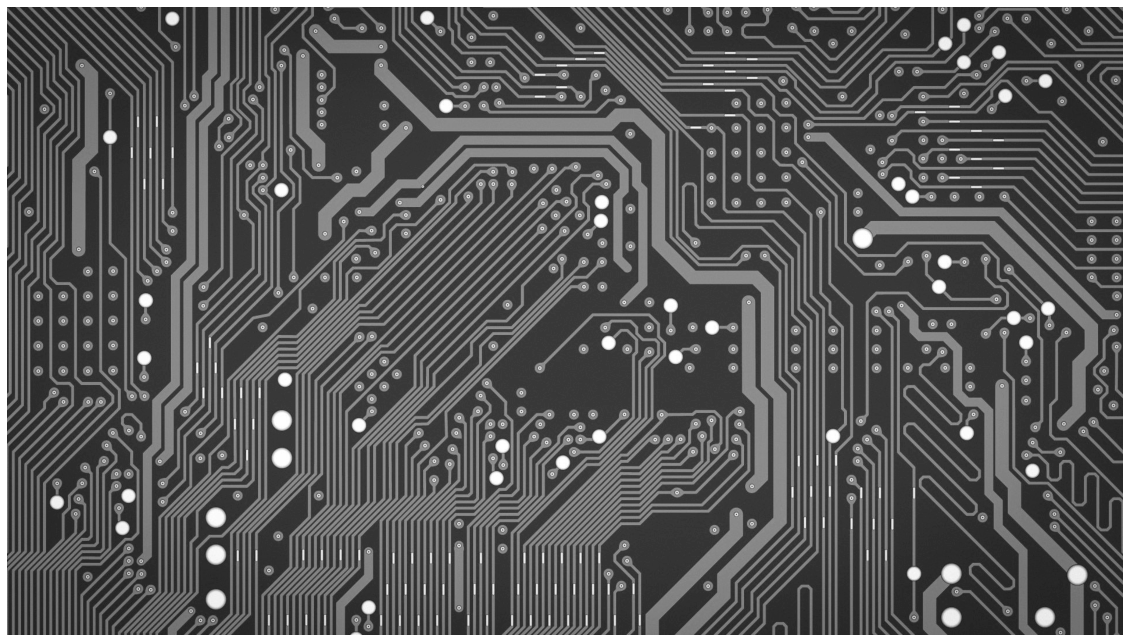

In [3]:

#下載測試影像
url = 'https://evatronix.com/images/en/offer/printed-circuits-board/Evatronix_Printed_Circuits_Board_01_1920x1080.jpg'
testimage= tf.keras.utils.get_file('pcb.jpg',url) #記得改網址的話 檔名也要改掉

#讀入測試影像
inputs= cv2.imread(testimage)

#轉成灰階影像
inputs= cv2.cvtColor(inputs,cv2.COLOR_BGR2GRAY) #轉成灰階

#顯示測試影像
plt.figure(figsize=(20,15))
plt.imshow(inputs,cmap='gray')
plt.axis(False)
plt.show()

In [4]:

#轉換影像表示方式成四軸張量(sample,height,width,channel)，以便使用卷積運算。
inputs = tf.convert_to_tensor(inputs,dtype=tf.float32)
inputs = inputs[tf.newaxis,:,:,tf.newaxis]  #擴增兩個維度

#使用卷積運算製作AdatpiveThresholding
#neighbor_size=61, C=-8
#用61*61的average filter
#AdaptiveThreshold(61,-8)是叫constructor 建構一個物件
#AdaptiveThreshold(61,-8)(inputs)是叫AdaptiveThreshold(61,-8)的call函數
binary = AdaptiveThreshold(61,-8)(inputs)

#存下AdaptiveThresholding結果
#binary這張圖現去掉大小為1的維度，再把大於零的部分會被設為255，小於零的部分會被設為0
outputs = tf.where(tf.squeeze(binary)>0,tf.constant([[255]],dtype=tf.uint8),tf.constant([[0]],dtype=tf.uint8))
cv2.imwrite('pcb_threshold.png',outputs.numpy())  #存下結果


Metal device set to: Apple M1


2022-05-11 14:23:26.954861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-11 14:23:26.955166: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


NameError: name 'AdaptiveThreshold' is not defined

In [ ]:
#顯示AdaptiveThresholding結果
plt.figure(figsize=(20,15))
plt.imshow(tf.squeeze(binary).numpy()*255,cmap='gray') #把大於零的部分會被設為255，小於零的部分會被設為0
plt.axis(False)
plt.show()

In [ ]:

#使用卷積運算製作Thinning (改成-1代表0,1代表1會比較好算)
binary = binary*2-1  #把前景的部分設為1，背景的部分設為-1
#用這個方式 只要區域和kernel一模一樣 就會得到9

#Thinning()(binary) 建立一個物件 直接呼叫call函數

outputs = tf.where(tf.squeeze(Thinning()(binary))>0,tf.constant([[255]],dtype=tf.uint8),tf.constant([[0]],dtype=tf.uint8))
outputs = tf.squeeze(outputs)

#存下細線化結果
cv2.imwrite('pcb_thinning.png',outputs.numpy())

#注意由於螢幕解析度，同學在螢幕上看到的細線化結果可能不是真正結果，此時必須看存下來的結果影像。
plt.figure(figsize=(20,15))
plt.imshow(outputs.numpy(),cmap='gray',interpolation='none')  #不要內插
plt.axis(False)
plt.show()